In [54]:
import pandas as pd
import numpy as np
import itertools
import sklearn.cluster as skc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
combined12 = pd.read_pickle('../combined13-14.pkl')
features12 = pd.read_pickle('../features13-14.pkl')

In [3]:
tr_features12 = features12.transpose()

In [4]:
tr_features12.columns

Index([u'avg_value', u'avg_value_smoothed', u'cum_value_list',
       u'match_value_list', u'nassists', u'naway_assists', u'naway_goals',
       u'nearly_assists', u'nearly_goals', u'nequalizer_assists',
       u'nequalizer_goals', u'ngoals', u'nhome_assists', u'nhome_goals',
       u'nlate_assists', u'nlate_goals', u'nmid_assists', u'nmid_goals',
       u'nsub_assists', u'nsub_goals', u'ntiebreaker_assists',
       u'ntiebreaker_goals', u'season_value', u'smoothed_value_list'],
      dtype='object')

In [5]:
#Splitting the smoothed_value_list into 38 new columns
split_fn = lambda x: pd.Series([i for i in x])
tr_features12_sm = tr_features12['smoothed_value_list'].apply(split_fn)

In [6]:
#Splitting the cum_value_list into 38 new columns
tr_features12_cm = tr_features12['cum_value_list'].apply(split_fn)

In [7]:
#Generating column names for the new dataframe
col_names_sm = []
col_names_cm = []
for i in range(38):
    col_names_sm.append('smooth_value_week_'+str(i+1))
    col_names_cm.append('cuml_value_week_'+str(i+1))

In [8]:
#Setting the column names for the new dataframe
tr_features12_sm.columns = col_names_sm
tr_features12_cm.columns = col_names_cm

In [9]:
#Concatenating the two dataframes
df_features12 = pd.concat([tr_features12,tr_features12_sm,tr_features12_cm],axis=1)

In [10]:
#Selecting columns to be clustered
columns_cluster = [[u'avg_value'], [u'avg_value_smoothed'],
        [u'nassists'], [u'naway_assists'], [u'naway_goals'],
        [u'nearly_assists'], [u'nearly_goals'], [u'nequalizer_assists'],
        [u'nequalizer_goals'], [u'ngoals'], [u'nhome_assists'], [u'nhome_goals'],
        [u'nlate_assists'], [u'nlate_goals'], [u'nmid_assists'], [u'nmid_goals'],
        [u'nsub_assists'], [u'nsub_goals'], [u'ntiebreaker_assists'],
        [u'ntiebreaker_goals'], [u'season_value'],col_names_sm, col_names_cm]
columns_cluster = list(itertools.chain(*columns_cluster))

In [11]:
#Creating a new dataframe to be used for clustering
df_clustering = df_features12[columns_cluster]

In [12]:
df_clustering.head()

,avg_value,avg_value_smoothed,nassists,naway_assists,naway_goals,nearly_assists,nearly_goals,nequalizer_assists,nequalizer_goals,ngoals,...,cuml_value_week_29,cuml_value_week_30,cuml_value_week_31,cuml_value_week_32,cuml_value_week_33,cuml_value_week_34,cuml_value_week_35,cuml_value_week_36,cuml_value_week_37,cuml_value_week_38
Aaron Hughes,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000
Aaron Hunt,0.8835526,0.8835526,7,4,3,2,0,1,3,7,...,20.2125,20.2125,22.9625,26.4125,30.4125,33.575,33.5750,33.5750,33.5750,33.5750
Aaron Lennon,0.1638158,0.1493421,4,2,0,0,0,0,0,1,...,2.6125,2.6125,2.6125,2.6125,2.6125,3.475,6.2250,6.2250,6.2250,6.2250
Aaron Ramsey,0.9121711,0.8631195,7,5,7,1,1,0,0,10,...,26.9000,26.9000,26.9000,26.9000,26.9000,26.900,31.2125,31.2125,31.2125,34.6625
AarÃ³n,0.1059211,0.1059211,1,1,1,0,0,1,0,1,...,4.0250,4.0250,4.0250,4.0250,4.0250,4.025,4.0250,4.0250,4.0250,4.0250


In [13]:
df_clustering.values

array([[0.0, 0.0, 0, ..., 0.0, 0.0, 0.0],
       [0.88355263157894726, 0.88355263157894726, 7, ..., 33.575, 33.575,
        33.575],
       [0.16381578947368419, 0.14934210526315789, 4, ..., 6.225, 6.225,
        6.225],
       ..., 
       [0.15559210526315789, 0.15559210526315789, 1, ..., 5.9125, 5.9125,
        5.9125],
       [0.18848684210526315, 0.18848684210526315, 0, ..., 7.1625, 7.1625,
        7.1625],
       [0.022697368421052629, 0.026858552631578946, 1, ...,
        0.8624999999999999, 0.8624999999999999, 0.8624999999999999]], dtype=object)

In [77]:
km = skc.KMeans(n_clusters=10)
km.fit(df_clustering.values)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [78]:
km.labels_

array([7, 1, 7, ..., 7, 0, 7], dtype=int32)

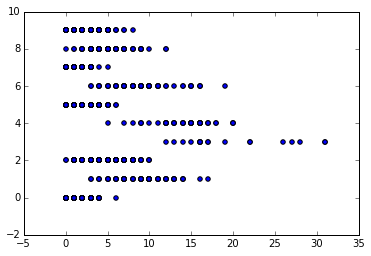

In [79]:
plt.scatter(df_clustering['ngoals'],km.labels_)

In [80]:
results = pd.DataFrame([df_clustering.index,km.labels_,df_clustering.season_value,\
                       df_clustering.ngoals,df_clustering.nassists,\
                       df_clustering.ntiebreaker_goals, df_clustering.ntiebreaker_assists]).T
results.columns = ['Player','Cluster','Value','Goals','Assists','TGoals', 'TAssists']

In [81]:
results[results['Player'] == 'Cristiano Ronaldo']

,Player,Cluster,Value,Goals,Assists,TGoals,TAssists
308,Cristiano Ronaldo,3,92.88,31,9,17,2


In [83]:
results[results['Cluster'] == 3]

,Player,Cluster,Value,Goals,Assists,TGoals,TAssists
28,AdriÃ¡n Ramos,3,55.0625,16,5,9,3
59,Alessio Cerci,3,56.5625,13,10,7,5
75,Alexis SÃ¡nchez,3,69.6375,19,11,9,6
103,AndrÃ©-Pierre Gignac,3,61.275,16,3,9,3
236,Carlos Vela,3,71.1,16,12,10,5
276,Ciro Immobile,3,72.1,22,3,12,2
308,Cristiano Ronaldo,3,92.88,31,9,17,2
340,Daniel Sturridge,3,60.3875,22,7,8,0
390,Diego Costa,3,62.225,27,3,11,2
421,Eden Hazard,3,51.1875,14,7,6,3
